In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('ENB2012_data.csv(1)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
#libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

#libraries for modeling

from sklearn.linear_model import LinearRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [6]:
df_energy=pd.read_csv("ENB2012_data.csv")


df_energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df_energy.rename(columns={"X1": "Relative Compactness", "X2" :"Surface Area" ,"X3": "Wall Area","X4": "Roof Area", "X5":"Overall Height","X6" :"Orientation","X7": "Glazing Area","X8" : "Glazing Area Distribution","Y1": "Heating Load","Y2": "Cooling Load"},inplace=True)



#get the info of the data
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
df_energy.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [9]:
df_energy.nunique()

Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64

In [10]:
df_energy.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [11]:
df_energy[df_energy["Glazing Area"]==0].describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.000000,48.000000
mean,0.764167,671.708333,318.500000,176.604167,5.250000,3.500000,0.0,0.0,14.286458,19.706250
std,0.106827,88.960297,44.059438,45.614184,1.768519,1.129865,0.0,0.0,7.625241,8.134356
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.0,0.0,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.500000,2.750000,0.0,0.0,7.037500,12.047500
50%,0.750000,673.750000,318.500000,183.750000,5.250000,3.500000,0.0,0.0,13.200000,18.980000
75%,0.830000,741.125000,343.000000,220.500000,7.000000,4.250000,0.0,0.0,19.747500,25.860000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.0,0.0,29.900000,39.440000


In [2]:
def box_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""\\
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]

        sns.boxplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Box Plot of {feat!r}")

SyntaxError: unexpected character after line continuation character (2879584131.py, line 9)

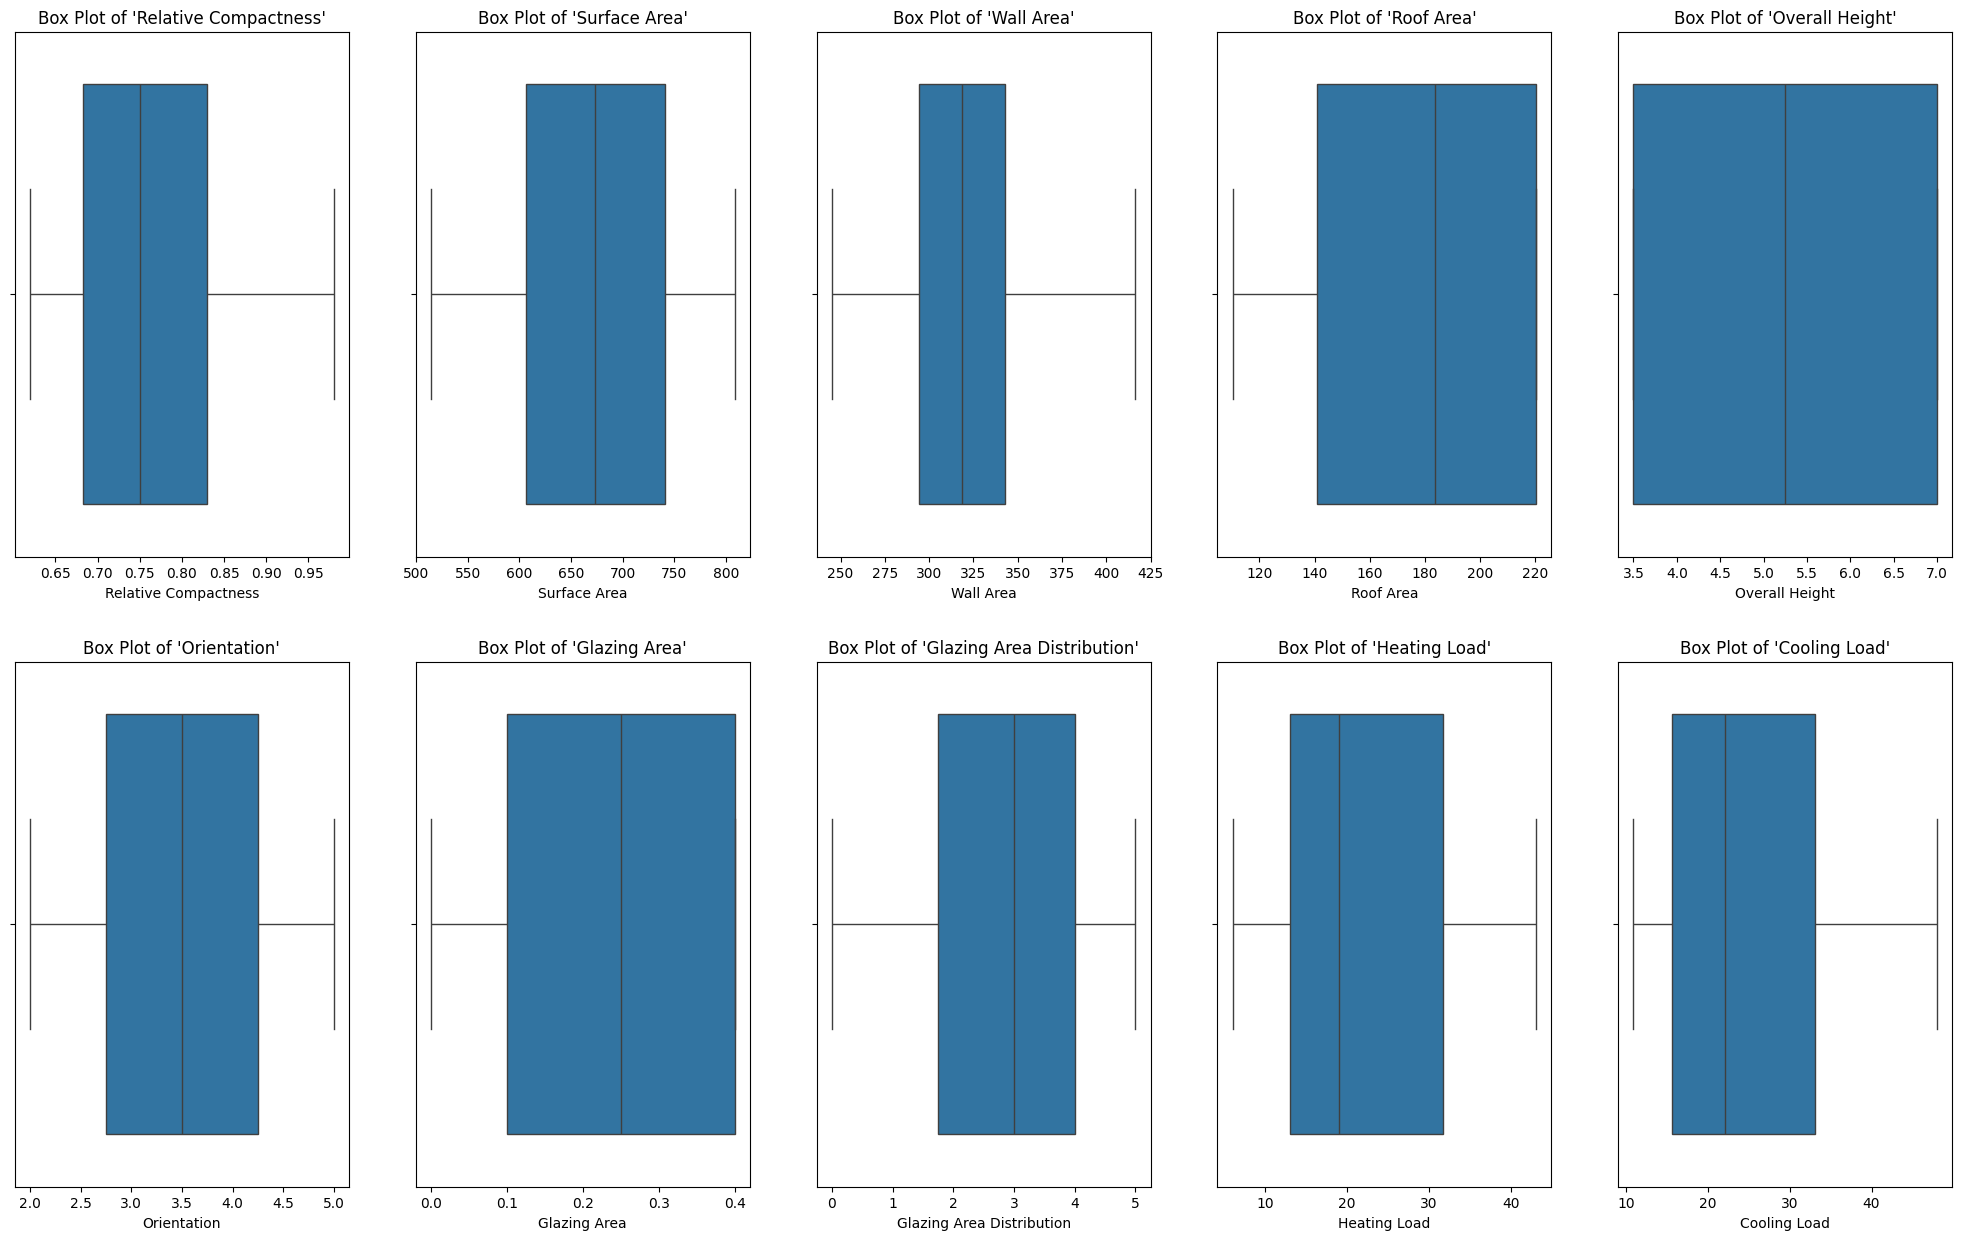

In [14]:
box_plots(data=df_energy,features=df_energy.columns,n_rows=2, n_cols=5, figsize=(25,15))

In [16]:
def Hist_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
) -> "Plot":
    """This returns a box plot of all the specified features."""
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]
        
        sns.histplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Hist Plot of {feat!r}")

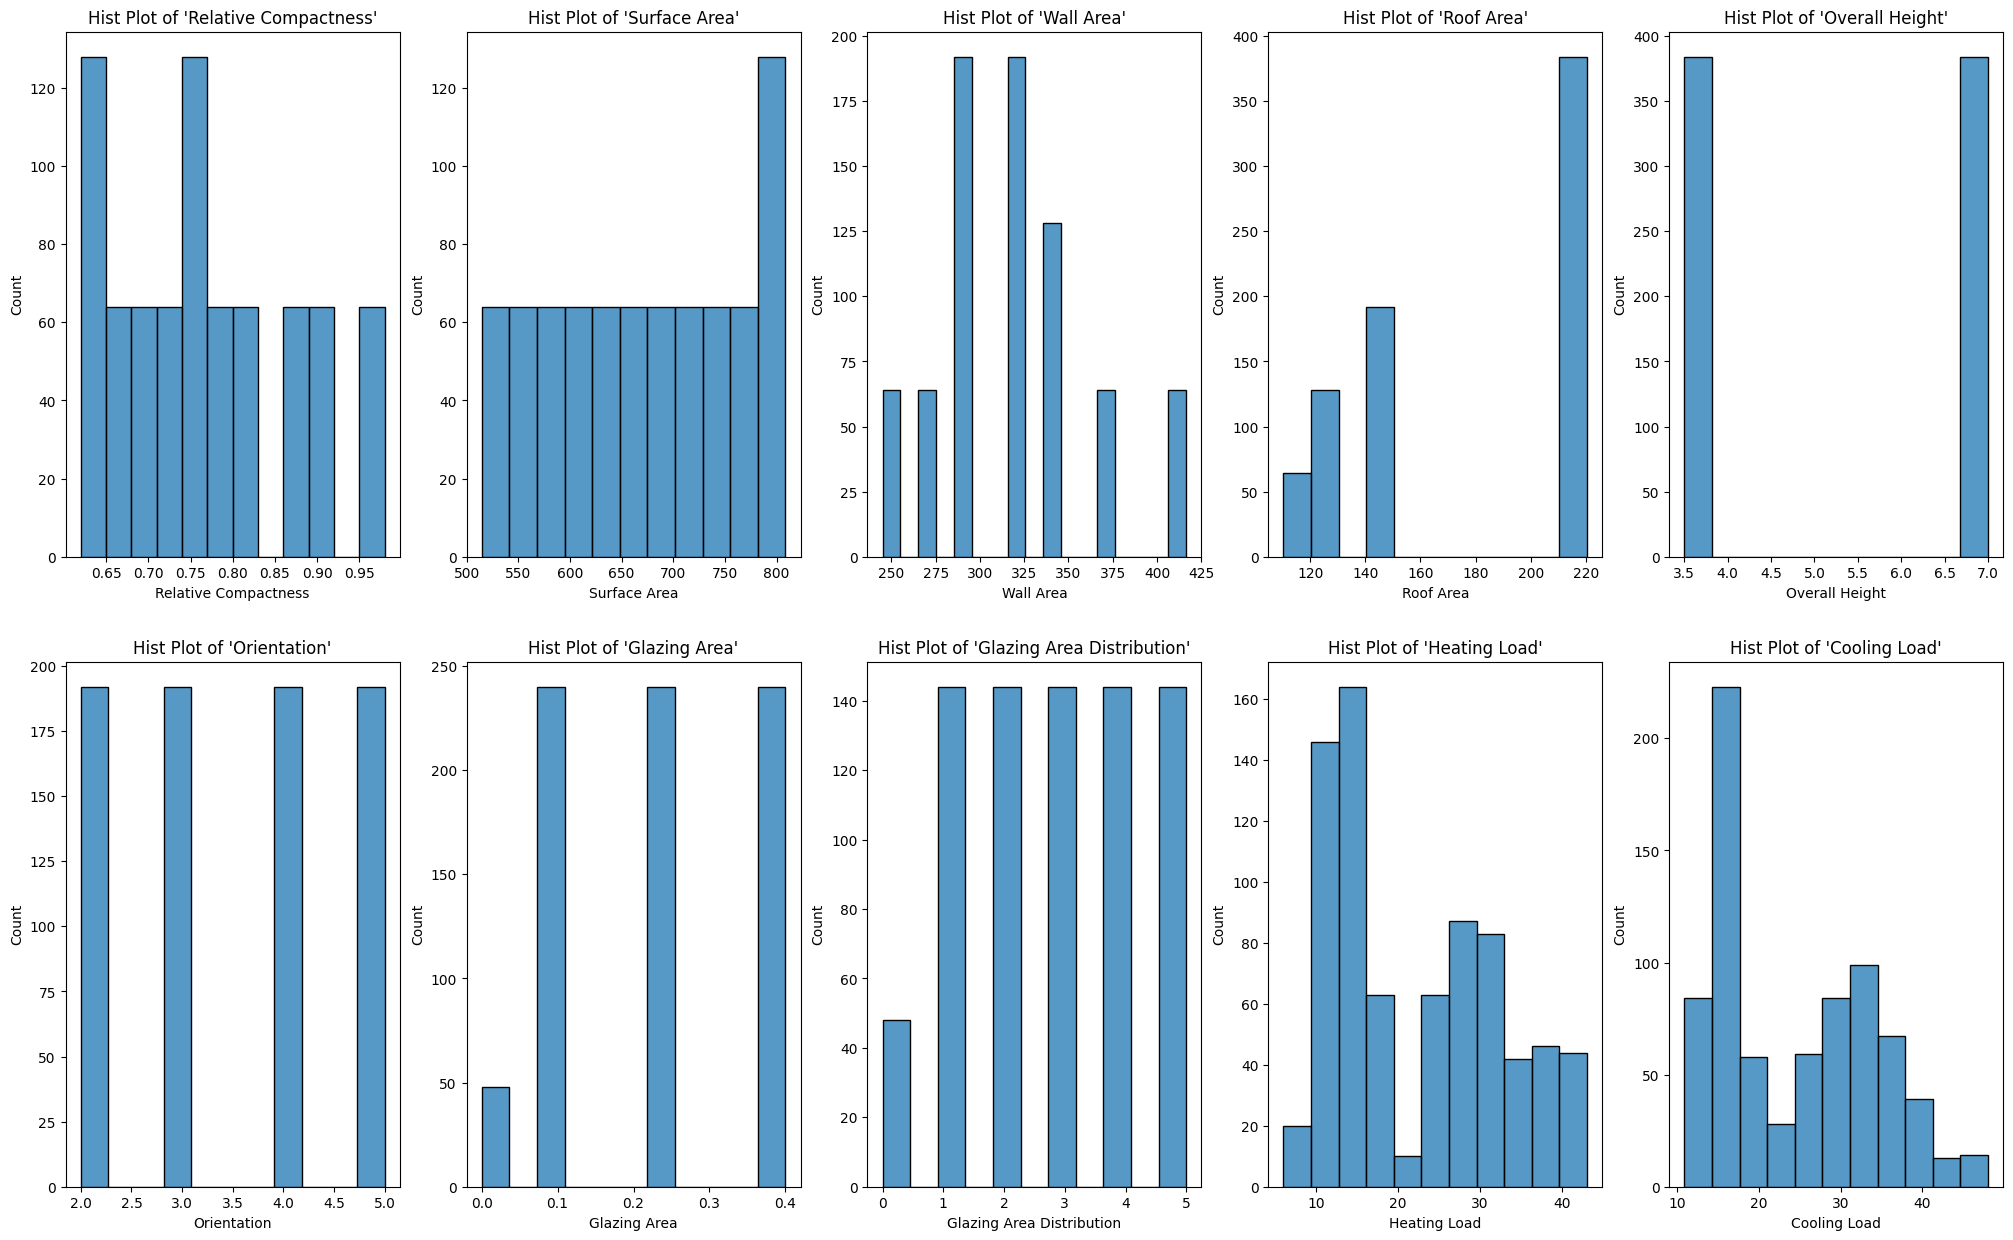

In [17]:

Hist_plots(data=df_energy,features=df_energy.columns,n_rows=2, n_cols=5, figsize=(25,15))

In [18]:
print("Skewness of Heating Load: %f" % df_energy['Heating Load'].skew())
print("Skewness of Cooling Load: %f" % df_energy['Cooling Load'].skew())

Skewness of Heating Load: 0.360449
Skewness of Cooling Load: 0.395992


In [19]:
df_energy["Orientation"].value_counts(normalize=True)

Orientation
2    0.25
3    0.25
4    0.25
5    0.25
Name: proportion, dtype: float64

In [20]:
df_energy["Glazing Area Distribution"].value_counts(normalize=True)

Glazing Area Distribution
1    0.1875
2    0.1875
3    0.1875
4    0.1875
5    0.1875
0    0.0625
Name: proportion, dtype: float64

In [21]:
df_energy["Overall Height"].value_counts(normalize=True)

Overall Height
7.0    0.5
3.5    0.5
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Cooling Load Vs Overall Height')

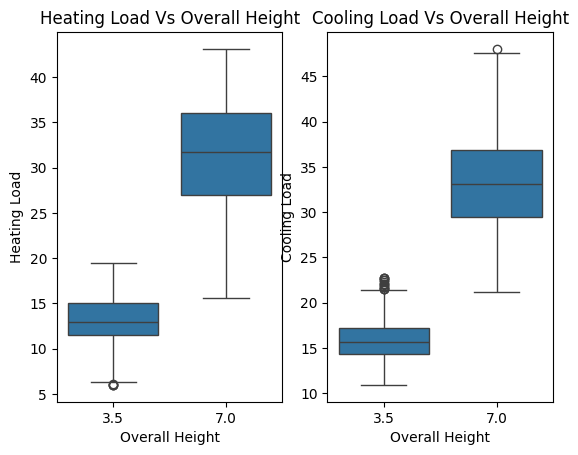

In [22]:
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df_energy, x="Overall Height", y= "Heating Load", ax=ax[0])
ax[0].set_title("Heating Load Vs Overall Height") 

sns.boxplot(data=df_energy, x="Overall Height", y="Cooling Load", ax=ax[1])
ax[1].set_title("Cooling Load Vs Overall Height")

<Figure size 1000x1000 with 0 Axes>

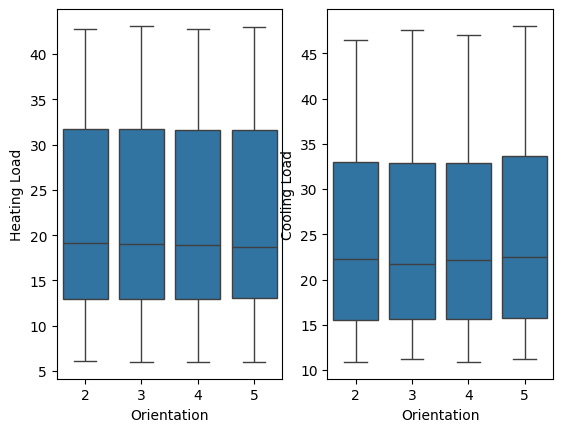

In [23]:
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df_energy, x="Orientation", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df_energy, x="Orientation", y="Cooling Load", ax=ax[1]);

In [24]:
df_energy.drop("Orientation", axis=1, inplace=True)

<Figure size 1000x1000 with 0 Axes>

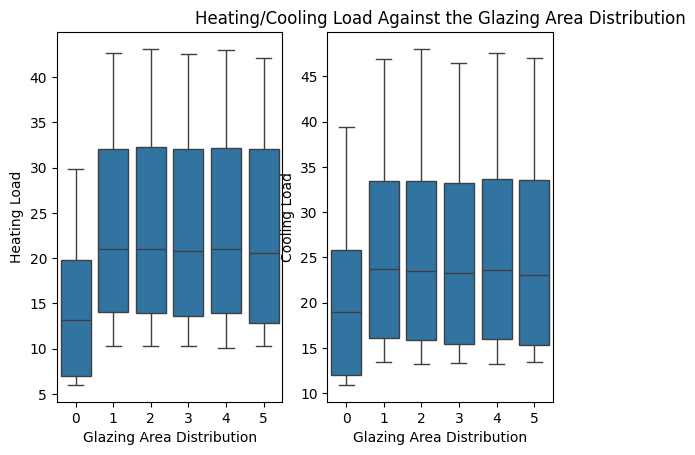

In [25]:
plt.figure(figsize=(10,10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y= "Heating Load", ax=ax[0])
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y="Cooling Load", ax=ax[1])
plt.title("Heating/Cooling Load Against the Glazing Area Distribution");

In [27]:
df_energy["Glazing Area Distribution"]=df_energy.replace({0:0,1:1,2:1,3:1,4:1,5:1}, inplace=True)

NameError: name 'df_energy' is not defined

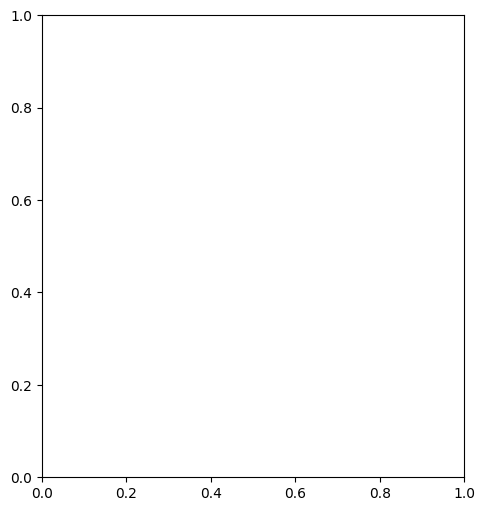

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y="Heating Load")
plt.title("Heating Load Against Glazing Area Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_energy, x="Glazing Area Distribution", y="Cooling Load")
plt.title("Cooling Load Against Glazing Area Distribution")

plt.suptitle("Heating/Cooling Load Against Glazing Area Distribution")
plt.tight_layout()
plt.show()


In [33]:
def Scatter_plots(
    *,
    data: pd.DataFrame,
    features: list,
    n_rows: int,
    n_cols: int,
    figsize: tuple = (15, 8),
    y
) -> "Plot":
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)

    for idx, feat in enumerate(features):
        if n_rows > 1:
            ax = axs[(idx // n_cols), (idx % n_cols)]
        else:
            ax = axs[idx]
        
        sns.scatterplot(data=data, x=feat, ax=ax, y=y)
        
        slope, intercept = np.polyfit(data[feat], data[y], 1) #get the slope and intercept of the line

        line_of_best_fit = slope * data[feat] + intercept   #get the y vectors

        sns.lineplot(data, x=feat, y=line_of_best_fit, label="Line of best fit", ax=ax) #plot the line of best fit

        ax.set_title(f"Scatter Plot of {feat!r} vs {y}")

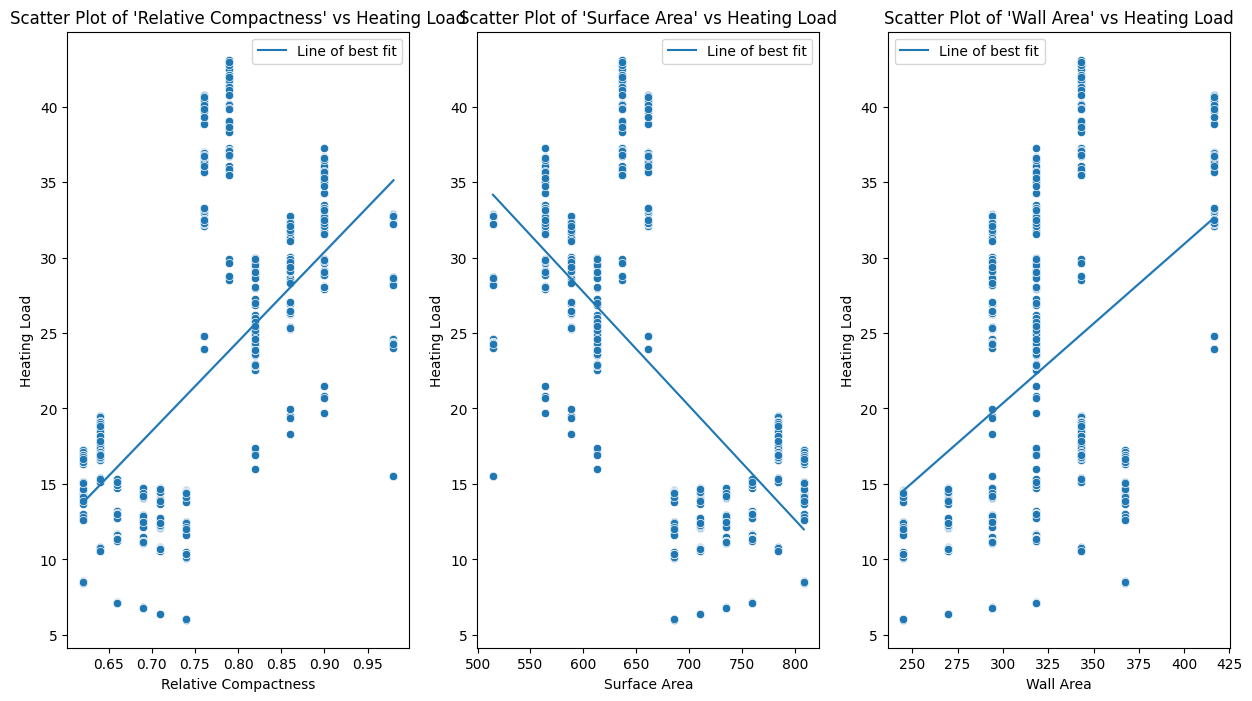

In [34]:
numerical_features=["Relative Compactness","Surface Area", "Wall Area"]
Scatter_plots(data=df_energy, features=numerical_features,n_rows=1,n_cols=3,y="Heating Load")

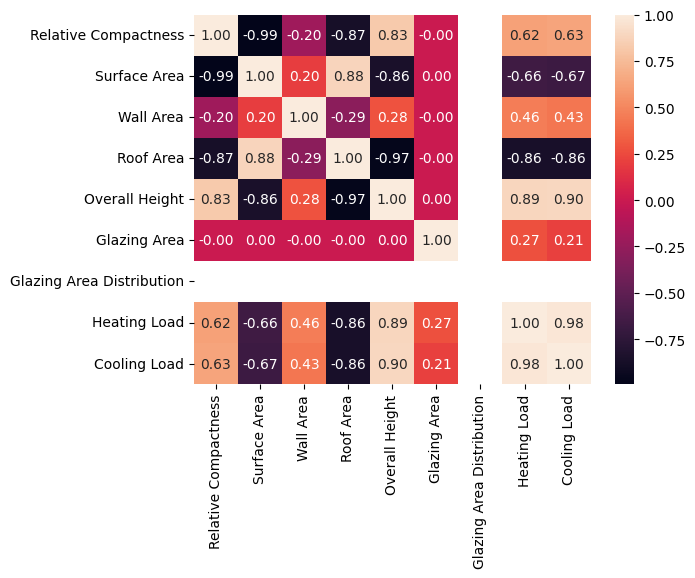

In [35]:
corr=df_energy.corr(method = 'pearson')
corr

#using heatmap to visulize the pearson correlation between variables
sns.heatmap(corr, annot=True,fmt=".2f");

In [36]:
df_energy.drop("Surface Area", inplace=True, axis=1)

In [37]:
TEST_SIZE=0.2    #test size of dataset
RANDOM_STATE=42
X=df_energy.drop(["Heating Load", "Cooling Load"], axis=1) #drop along the column
y=df_energy["Cooling Load"]   #subset the column Cooling Load

#split dataset into train and test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((614, 6), (154, 6))

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       614 non-null    float64
 1   Wall Area                  614 non-null    float64
 2   Roof Area                  614 non-null    float64
 3   Overall Height             614 non-null    float64
 4   Glazing Area               614 non-null    float64
 5   Glazing Area Distribution  0 non-null      object 
dtypes: float64(5), object(1)
memory usage: 33.6+ KB


In [39]:
var_to_scale=X_train.select_dtypes(include=["float64", "int64"]).columns

In [40]:
scaler = MinMaxScaler()

#column transformer instantiation
col_transformer = ColumnTransformer(
    transformers=[ ("scaler", scaler, var_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 Index(['Relative Compactness', 'Wall Area', 'Roof Area', 'Overall Height',
       'Glazing Area'],
      dtype='object'))])

In [41]:
X_train_trans=col_transformer.fit_transform(X_train) 
X_test_trans=col_transformer.transform(X_test) 

In [42]:
X_train

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
60,0.82,318.5,147.00,7.0,0.10,None
618,0.64,343.0,220.50,3.5,0.40,None
346,0.86,294.0,147.00,7.0,0.25,None
294,0.90,318.5,122.50,7.0,0.25,None
231,0.66,318.5,220.50,3.5,0.10,None
...,...,...,...,...,...,...
71,0.76,416.5,122.50,7.0,0.10,None
106,0.86,294.0,147.00,7.0,0.10,None
270,0.71,269.5,220.50,3.5,0.10,None
435,0.98,294.0,110.25,7.0,0.25,None


In [43]:
df_train_trans=pd.DataFrame(data=X_train_trans, columns=X_train.columns)
df_train_trans

,Relative Compactness,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution
0,0.555556,0.428571,0.333333,1.0,0.25,None
1,0.055556,0.571429,1.0,0.0,1.0,None
2,0.666667,0.285714,0.333333,1.0,0.625,None
3,0.777778,0.428571,0.111111,1.0,0.625,None
4,0.111111,0.428571,1.0,0.0,0.25,None
...,...,...,...,...,...,...
609,0.388889,1.0,0.111111,1.0,0.25,None
610,0.666667,0.285714,0.333333,1.0,0.25,None
611,0.25,0.142857,1.0,0.0,0.25,None
612,1.0,0.285714,0.0,1.0,0.625,None


In [78]:
import numpy as np

def zero_rule_algorithm_regression(y_train, y_test):
    '''A function to calculate the prediction from a baseline model using its mean
    Params:
    y_train (pd.Dataframe): Take the target train values as input
    
    Return
    The predicted values i.e mean of the target values.
    '''
    prediction=np.mean(y_train)
    y_pred=[prediction]*len(y_test)
    return y_pred

#perfromance metric function

def performance_metrics(y_pred, y_test):
    '''Function to calculate the MSE, RMSE and MSE '''
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=mean_squared_error(y_test,y_pred,squared=False)
    r2=r2_score(y_test,y_pred)
    
    return f"Mean Absoluete Error: {mae}\n Mean Square Error: {mse}\n Root Mean Sqaured Error: {rmse}\n R2: {r2} "

In [79]:
y_pred_baseline_=zero_rule_algorithm_regression(y_train, y_test)

In [81]:
from sklearn.metrics import mean_squared_error
import numpy as np

def performance_metrics(y_pred_baseline, y_test):
    # Compute the Mean Squared Error
    mse_baseline = mean_squared_error(y_test, y_pred_baseline, squared=False)
    
    return mse_baseline

# Call the zero_rule_algorithm_regression function
y_pred_baseline = zero_rule_algorithm_regression(y_train, y_test)

# Compute performance metrics
baseline_error_y = performance_metrics(y_pred_baseline, y_test)

print("Baseline Error for y:\n", baseline_error_y)


Baseline Error for y:
 9.666248182723116


C:\Users\pushp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [84]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Initialize different regression models
    models = [
        ("Linear Regression", LinearRegression()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("SVM", SVR()),  
        ("XGBoost", XGBRegressor()),
        ("K-Nearest Neighbors", KNeighborsRegressor())
    ]
   
    model_names = []
    mse_values = []
    mae_values = []
    rmse_values = []
    r2_values = []
    
    for model_name, model in models:
        model.fit(X_train_imputed, y_train)
        y_pred = model.predict(X_test_imputed)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse =mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        
        model_names.append(model_name)
        mse_values.append(mse)
        mae_values.append(mae)
        rmse_values.append(rmse)
        r2_values.append(r2)
        
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Mean Absolute Error': mae_values,
        'Root Mean Squared Error': rmse_values,
        'Mean Squared Error': mse_values,
        'R-squared (R2)': r2_values
    })
    
    return metrics_df


metrics_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)


print(metrics_df)


C:\Users\pushp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Glazing Area Distribution']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\pushp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Glazing Area Distribution']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\pushp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared 

                 Model  Mean Absolute Error  Root Mean Squared Error  \
0    Linear Regression             2.201210                 3.155028   
1        Decision Tree             1.165358                 1.748119   
2        Random Forest             1.163561                 1.743698   
3                  SVM             3.323061                 4.613106   
4              XGBoost             1.165082                 1.747994   
5  K-Nearest Neighbors             1.269883                 2.046523   

   Mean Squared Error  R-squared (R2)  
0            9.954203        0.892570  
1            3.055920        0.967019  
2            3.040482        0.967186  
3           21.280749        0.770328  
4            3.055482        0.967024  
5            4.188258        0.954798  


C:\Users\pushp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pushp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\pushp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea

In [5]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X, y)

# Get feature importance for Decision Tree
dt_feature_importance = dt_model.feature_importances_5

NameError: name 'DecisionTreeRegressor' is not defined

In [7]:
feat_import=pd.DataFrame(columns=X_train.columns, data=[dt_feature_importance,rf_feature_importance],index=["Decision Tree", "Random forest", "Xgboost"])
feat_import

NameError: name 'pd' is not defined

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

models = ["Decision Tree", "Random Forest", "XGBoost"]  # Corrected spelling of "XGBoost"
feat_import = [dt_feature_importance, rf_feature_importance, xgboost_feature_importance]  # Assuming you have a variable named `xgboost_feature_importance`

for i, model in enumerate(models):
    ax = plt.subplot(3, 1, i+1)  # Create subplots directly without using plt.subplots()
    sns.barplot(y=feat_import[i], x=X_train.columns, ax=ax)
    ax.set_title(f"{model} Model")
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)  # Set x-axis tick label font size

plt.tight_layout()
plt.show()



NameError: name 'dt_feature_importance' is not defined

<Figure size 1500x1000 with 0 Axes>